## 1. 머신러닝

### 학생 결석 여부 확인 데이터

성별(sex) 바이너리 : 'F' - 여성 또는 'M' - 남성     
나이(age) 숫자: 15 - 22     
부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 'A': 별거       
엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육    
아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육   
주보호자(guardian) 명목형 : '어머니', '아버지' 또는 '기타'     
등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상       
학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상    
학고횟수(failures)  숫자 : 1, 2, 3 else 4     
자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)   
가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)    

In [126]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem1.csv')
df.head()

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4


### 1-1 
데이터 EDA 및 시각화

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


종속변수는 absences 로 연속형 변수이고, 나머지는 독립변수는 age 변수만 양적변수에 해당되고 모두 질적변수(명목척도, 서열척도) 데이터이다.  
질적변수의 데이터타입을 카테고리로 바꾸겠다.

In [128]:
quan = ['age']
qual = df.columns.drop(['age', 'absences'])

In [129]:
# 기술통계량 확인
df.describe(include=['float64', 'int64'])

,age,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences
count,392.000000,395.000000,395.000000,395.000000,392.000000,395.000000,395.000000,390.000000,395.000000
mean,16.698980,2.521519,2.749367,2.035443,1.446429,0.334177,3.944304,3.233333,5.708861
std,1.279865,1.088201,1.094735,0.839240,0.695022,0.743651,0.896659,1.000985,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,17.000000,2.000000,3.000000,2.000000,1.000000,0.000000,4.000000,3.000000,4.000000
75%,18.000000,3.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,75.000000


In [130]:
df.describe(include='object')

,sex,Pstatus,guardian
count,395,395,395
unique,2,2,3
top,F,T,mother
freq,208,354,273


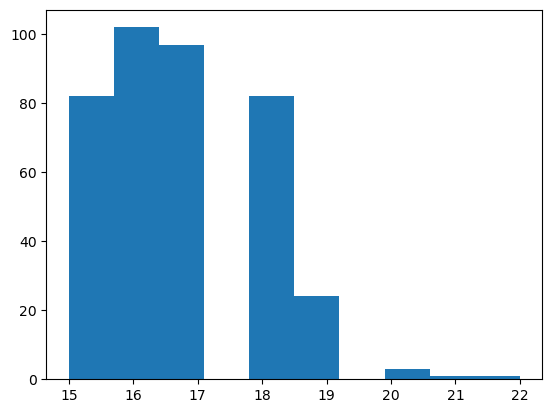

age 
16.0    102
17.0     97
15.0     82
18.0     82
19.0     24
20.0      3
21.0      1
22.0      1
Name: count, dtype: int64

In [131]:
# 양적변수 시각화
import matplotlib.pyplot as plt
plt.hist(df[quan])
plt.show()

df[quan].value_counts()

15~17 살의 인원이 가장 많은 것으로 나타났고, 20세 이상 인원은 매우 적은 것으로 나타났다.

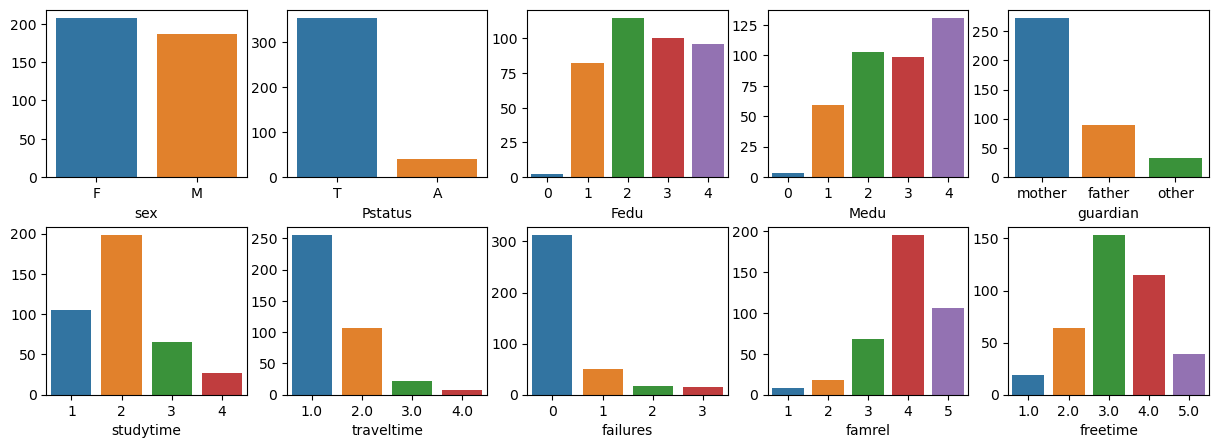

In [132]:
# 질적변수 시각화
import seaborn as sns

fig, ax = plt.subplots(2, 5, figsize = (15, 5))
plt.subplots_adjust(hspace=0.3)

for i, col in enumerate(qual):
    temp = df[col].value_counts()
    sns.barplot(x = temp.index, y = temp.values, ax = ax[i // 5, i % 5])


질적변수를 통해 알 수 있는 것으로 부모님의 동거여부는 동거가 훨씬 많고, 주보호자는 mother 이, 등하교 시간은 1.0, 학고여부는 0이 가장 높다.

### 1-2 
결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

In [133]:
df.isnull().sum()

sex           0
age           3
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    3
failures      0
famrel        0
freetime      5
absences      0
dtype: int64

결측치를 보았을 때 age, traveltime 에 3개, freetime 에 5개가 존재한다.

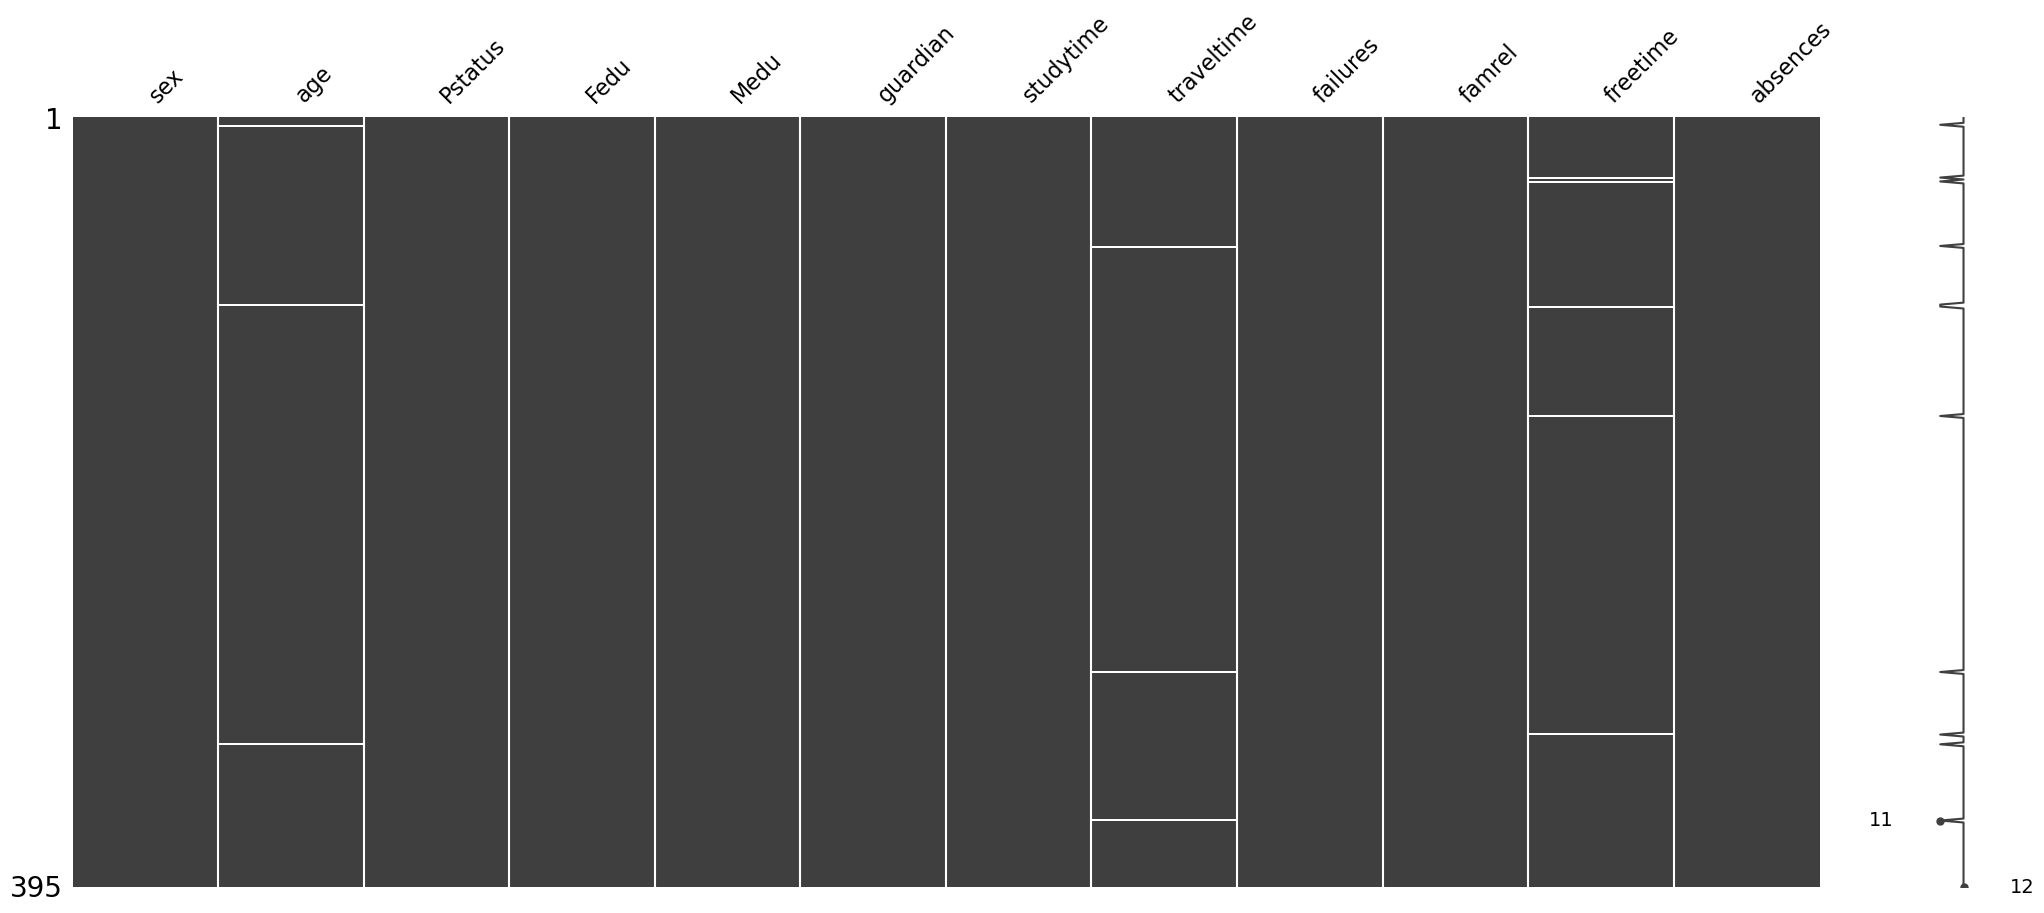

In [134]:
# 결측치 시각화
import missingno as msno
msno.matrix(df = df)
plt.show()

In [135]:
df['traveltime'].mode().values

array([1.])

In [136]:
# 결측치 처리
# 결측치가 모두 같은 행에 존재한다면 결측치를 제거도 고려해보아야 한다.

index1 = df[df['age'].isna()].index
index2 = df[df['traveltime'].isna()].index
index3 = df[df['freetime'].isna()].index

print(index1, index2, index3) # 같은 행에 존재하지는 않는다. 따라서 결측치 제거보다는 대체하는 것으로 한다.

# age 는 중앙값, freetime, traveltime 모두 최빈값으로 대체하자.
df['age'] = df['age'].fillna(df['age'].median())
df['traveltime'] = df['traveltime'].fillna(df['traveltime'].mode()[0])
df['freetime'] = df['freetime'].fillna(df['freetime'].mode()[0])

Index([4, 96, 321], dtype='int64') Index([66, 284, 360], dtype='int64') Index([31, 33, 97, 153, 316], dtype='int64')


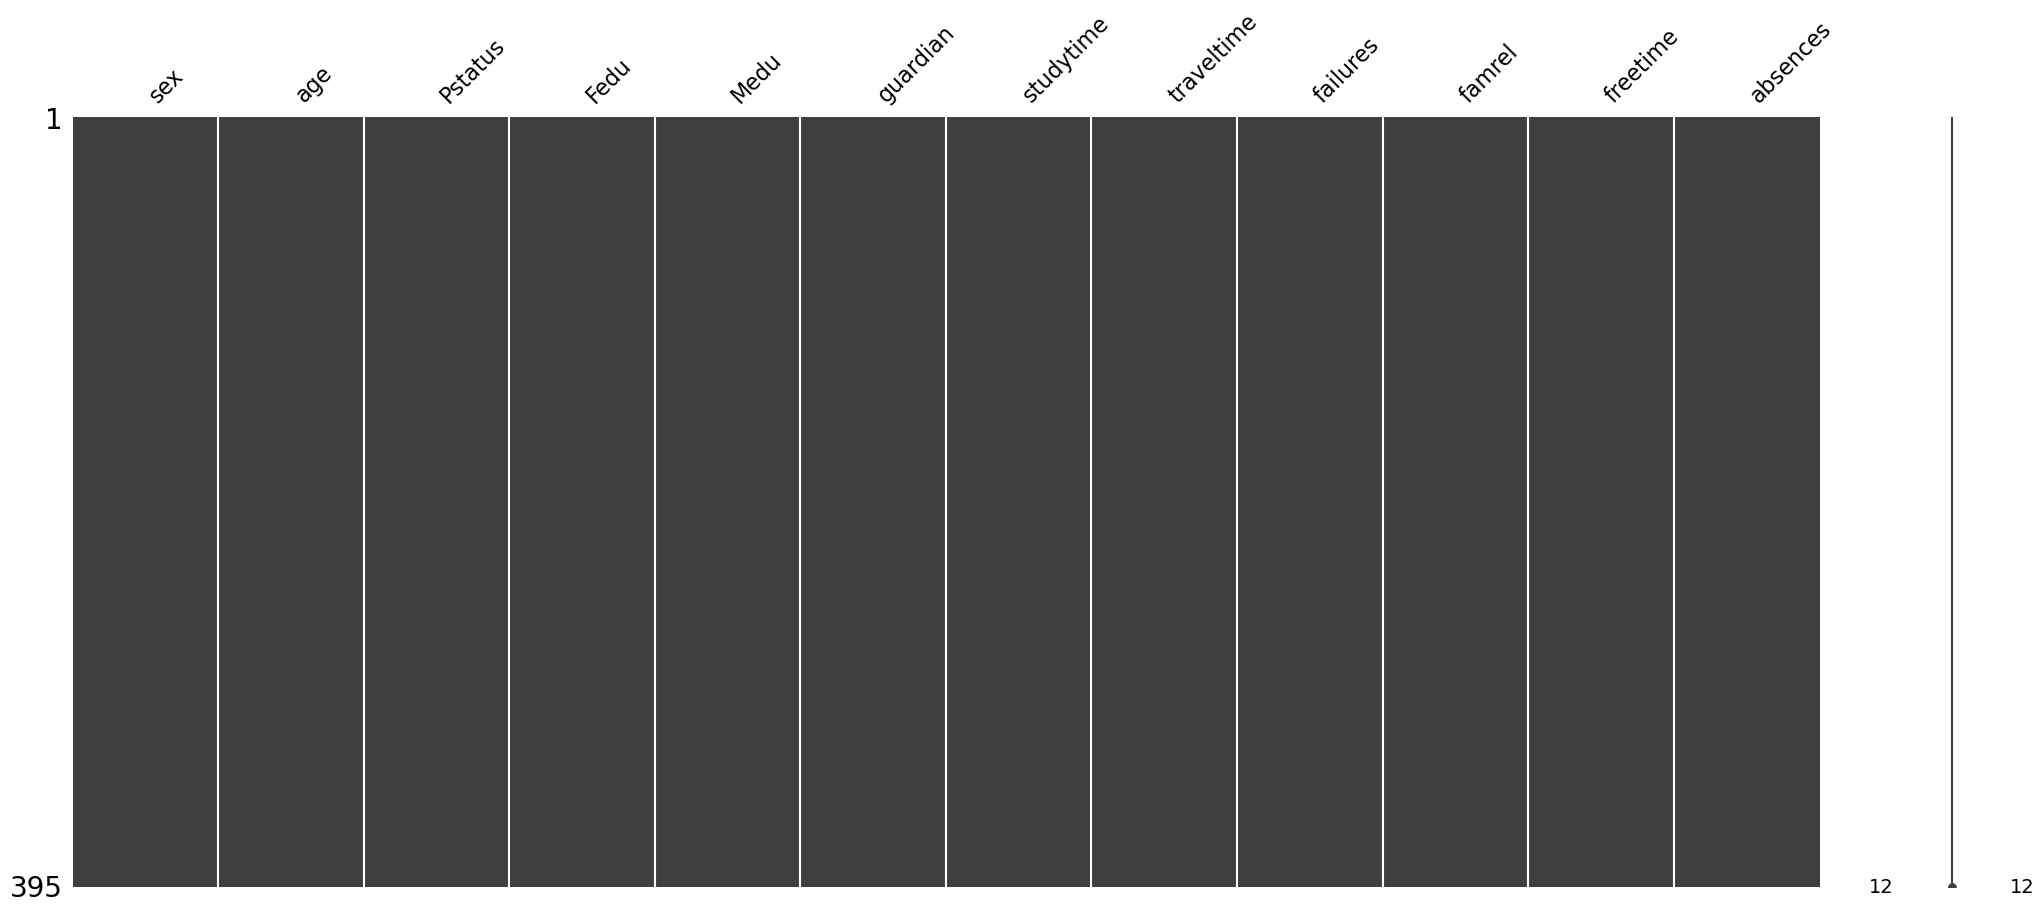

In [137]:
# 결측치 시각화
import missingno as msno
msno.matrix(df = df)
plt.show()

추가적인 전처리로는 sex, guardian, Pstatus 변수를 가변수 처리 해주어야 한다.

In [138]:
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})
df['Pstatus'] = df['Pstatus'].map({'A' : 0, 'T' : 1})

# guardian 변수는 범주가 3개이므로 get_dummies 를 이용해 처리하겠다.
# drop_first = True 설정하여 공선성을 없애고자 했다.
df = pd.get_dummies(df, columns = ['guardian'], drop_first= True).astype('float64')

df

,sex,age,Pstatus,Fedu,Medu,studytime,traveltime,failures,famrel,freetime,absences,guardian_mother,guardian_other
0,0.0,18.0,0.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,6.0,1.0,0.0
1,0.0,17.0,1.0,1.0,1.0,2.0,1.0,0.0,5.0,3.0,4.0,0.0,0.0
2,0.0,15.0,1.0,1.0,1.0,2.0,1.0,3.0,4.0,3.0,10.0,1.0,0.0
3,0.0,15.0,1.0,2.0,4.0,3.0,1.0,0.0,3.0,2.0,2.0,1.0,0.0
4,0.0,17.0,1.0,3.0,3.0,2.0,1.0,0.0,4.0,3.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,20.0,0.0,2.0,2.0,2.0,1.0,2.0,5.0,5.0,11.0,0.0,1.0
391,1.0,17.0,1.0,1.0,3.0,1.0,2.0,0.0,2.0,4.0,3.0,1.0,0.0
392,1.0,21.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,0.0,1.0
393,1.0,18.0,1.0,2.0,3.0,1.0,3.0,0.0,4.0,4.0,0.0,1.0,0.0


### 1-3 
결석일수 예측모델을 2개 제시하고 선택한 근거 설명

LogisticRegression 과 RandomForest 모델을 선택하였다.  
LinearRegression 모델은 속도적인 측면에서 좋은 성능을 보이므로 선택하였고, RandomForest 모델은 앙상블 모델로 정확도 측면에서 좋은 성능을 보이므로 선택하였다.

### 1-4 
선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

평가 기준으로는 accuracy 를 사용하였다.  
분류분석에서 대표적인 평가지표로써 얼마나 결석했는지의 정확도가 중요하다고 판단된다.

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

X = df.drop(['absences'], axis = 1)
y = df['absences']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

log = LogisticRegression()
start = time.time()
log.fit(X_train_scaled, y_train)
end = time.time()

y_pred_log = log.predict(X_test_scaled)

print('log 걸린시간 :', end - start)
print('lr accuracy :', accuracy_score(y_test, y_pred_log))

log 걸린시간 : 0.024266481399536133
lr accuracy : 0.2773109243697479


In [158]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'max_depth' : [3,4,5,6], 'min_samples_split' : np.arange(2, 30, 3)}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid, cv = 4)
grid_rf.fit(X_train, y_train)

grid_rf.best_params_

c:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


{'max_depth': 6, 'min_samples_split': 14}

In [159]:
rf = RandomForestClassifier(max_depth=6, min_samples_split=14)
start = time.time()
rf.fit(X_train, y_train)
end = time.time()

y_pred_rf = rf.predict(X_test)
print('rf 걸린시간 :', end - start)
print('rf accuracy :', accuracy_score(y_test, y_pred_rf))

rf 걸린시간 : 0.245330810546875
rf accuracy : 0.2857142857142857


속도는 로지스틱회귀분석이 더 빠른 걸 알 수 있고, 정확도는 랜덤포레스트가 더 높지만 정확도가 낮아 비교가 잘 되었다고 하기 어렵다.  
데이터가 과적합되어있다고 판단된다.

### 1-5 
모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

### 1-6 
모델 최적화 방안에 대해 구체적으로 설명하라

## 2 통계분석
광고횟수와 광고비에 따른 매출액의 데이터이다. 

In [169]:
import pandas as pd
df = pd.read_csv('./data24/problem2.csv', encoding= 'cp949')
df

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20
5,6,높음,22
6,7,낮음,24
7,9,높음,26
8,11,높음,28
9,12,낮음,29


### 2-1 
광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

In [170]:
# df['광고비'] = df['광고비'].map({'낮음' : 0 , '높음' : 1})

from statsmodels.formula.api import ols

lr = ols('매출액 ~ 광고횟수 + 광고비', data = df)
result = lr.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           9.96e-08
Time:                        11:44:30   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1641      0.556     21.876      0.0

c:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


광고횟수의 p-value 는 0.05보다 작으므로 유의하지만 광고비의 p-value 는 0.05보다 크므로 유의하지 않다.

### 2-2 
회귀식이 유의한지 판단

F 통계량의 pvalue 가 0.05보다 작으므로 회귀식은 통계적으로 유의하다.

## 3
A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

### 3-1 
귀무가설과 대립가설을 세워라 

In [171]:
# H0 : 두 제품의 평균은 같다.
# H1 : 두 제품의 평균은 다르다.

### 3-2 
두 평균이 차이가 있는지 검정하라

In [175]:
from scipy.stats import norm
mean_a = 5.7
std_a = 0.03
mean_b = 5.6
std_b = 0.04
n = 12

Sp = np.sqrt(std_a**2 / n + std_b**2 / n)

z_score = (mean_a - mean_b) / Sp
pvalue = norm.sf(z_score)

print(pvalue)

# 귀무가설을 기각. 즉 두 제품의 평균은 다르다.

2.1310957989212665e-12


## 4
바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라  

![image](https://github.com/Datamanim/datarepo/blob/main/adp/24/problem4.png?raw=true)


In [176]:
370 / (370 + 10)

0.9736842105263158

## 5 
주어진 데이터에서 신뢰구간을 구하려한다  
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]     
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]


### 5-1 
모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

In [186]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
s = np.std(data, ddof = 1)

X = np.mean(data)
n = len(data)
conf_a = 0.05


from scipy.stats import norm

SE = s / np.sqrt(n)

z_score = norm.ppf(1- conf_a / 2)
ME = z_score * SE

print('신뢰구간 :{} ~ {}'.format(X-ME, X+ME))

신뢰구간 :3.539431523586565 ~ 4.238346254191212


### 5-2 
sigma = 0.04인걸 알고있을때의 95% 신뢰구간을 구하라 

In [181]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

X = np.mean(data)
n = len(data)
sigma = 0.04
conf_a = 0.05

from scipy.stats import norm

SE = sigma / np.sqrt(n)

z_score = norm.ppf(1- conf_a / 2)
ME = z_score * SE

print('신뢰구간 :{} ~ {}'.format(X-ME, X+ME))

신뢰구간 :3.862756035761688 ~ 3.9150217420160898
